In [3]:
import pandas as pd

df = pd.read_csv('data/preprocessed_20221106.csv', index_col=0)

In [31]:
df

,Survived,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble
0,0,3,1,0,1,2,0,0,0,0,1,0,1,0,0,0
1,1,1,1,0,1,4,4,5,1,0,0,0,0,1,0,0
2,1,3,0,0,1,3,1,0,0,0,1,0,0,0,1,0
3,1,1,1,0,1,4,4,5,0,0,1,0,0,1,0,0
4,0,3,0,0,1,4,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,3,2,0,0,0,1,0,0,0,0,1
887,1,1,0,0,1,2,3,6,0,0,1,0,0,0,1,0
888,0,3,1,2,0,2,3,0,0,0,1,0,0,0,1,0
889,1,1,0,0,1,3,3,5,1,0,0,0,1,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,1:], df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [21]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [22]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

acc=0.7985074626865671


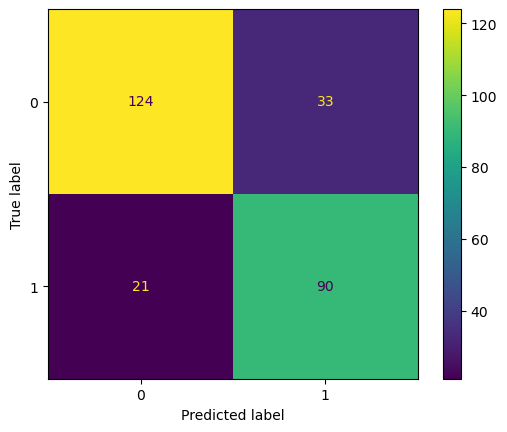

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = naive_bayes.predict(X_test)

cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)
print(f'{acc=}')
ConfusionMatrixDisplay(cm).plot()

In [29]:
for feature in X_test.columns:
    print(feature)
    for value in X_test[feature].unique():
        indices = X_test[feature] == value
        true_feature = y_test[indices]
        pred_feature = predictions[indices]
        print(' -', value, ': true = ', sum(true_feature), '\tpred = ', sum(pred_feature))

Pclass
 - 3 : true =  34 	pred =  41
 - 2 : true =  24 	pred =  29
 - 1 : true =  53 	pred =  53
SibSp
 - 1 : true =  39 	pred =  46
 - 0 : true =  68 	pred =  71
 - 2 : true =  4 	pred =  3
 - 3 : true =  0 	pred =  3
 - 4 : true =  0 	pred =  0
Parch
 - 1 : true =  18 	pred =  26
 - 0 : true =  78 	pred =  75
 - 2 : true =  14 	pred =  19
 - 3 : true =  0 	pred =  1
 - 4 : true =  0 	pred =  0
 - 5 : true =  1 	pred =  2
Age_true
 - 0 : true =  20 	pred =  18
 - 1 : true =  91 	pred =  105
AgeGroup
 - 0 : true =  11 	pred =  15
 - 3 : true =  27 	pred =  22
 - 2 : true =  26 	pred =  29
 - 1 : true =  7 	pred =  7
 - 4 : true =  30 	pred =  34
 - 5 : true =  10 	pred =  16
FareGroup
 - 2 : true =  18 	pred =  27
 - 1 : true =  14 	pred =  13
 - 3 : true =  32 	pred =  31
 - 4 : true =  24 	pred =  27
 - 0 : true =  9 	pred =  8
 - 5 : true =  14 	pred =  17
CabinLvl
 - 0 : true =  65 	pred =  74
 - 4 : true =  12 	pred =  12
 - 5 : true =  12 	pred =  12
 - 7 : true =  3 	pred =  4
 